In [1]:
!pip install kaggle


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# URL of the dataset (latest version)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Define the column names for the dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset directly from the URL
data = pd.read_csv(url, header=None, names=column_names)
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

api = KaggleApi()
api.authenticate()

# Specify the dataset identifier and the download folder
dataset = "uciml/pima-indians-diabetes-database"
download_path = "./data"
os.makedirs(download_path, exist_ok=True)

# Download and unzip the dataset
api.dataset_download_files(dataset, path=download_path, unzip=True)
print("Dataset downloaded and unzipped successfully!")


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
Dataset downloaded and unzipped successfully!


In [12]:
# Define the path to the CSV file
data_path = os.path.join(download_path, "diabetes.csv")  # Adjust filename if necessary

# Load the dataset into a pandas DataFrame
data = pd.read_csv(data_path)
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.

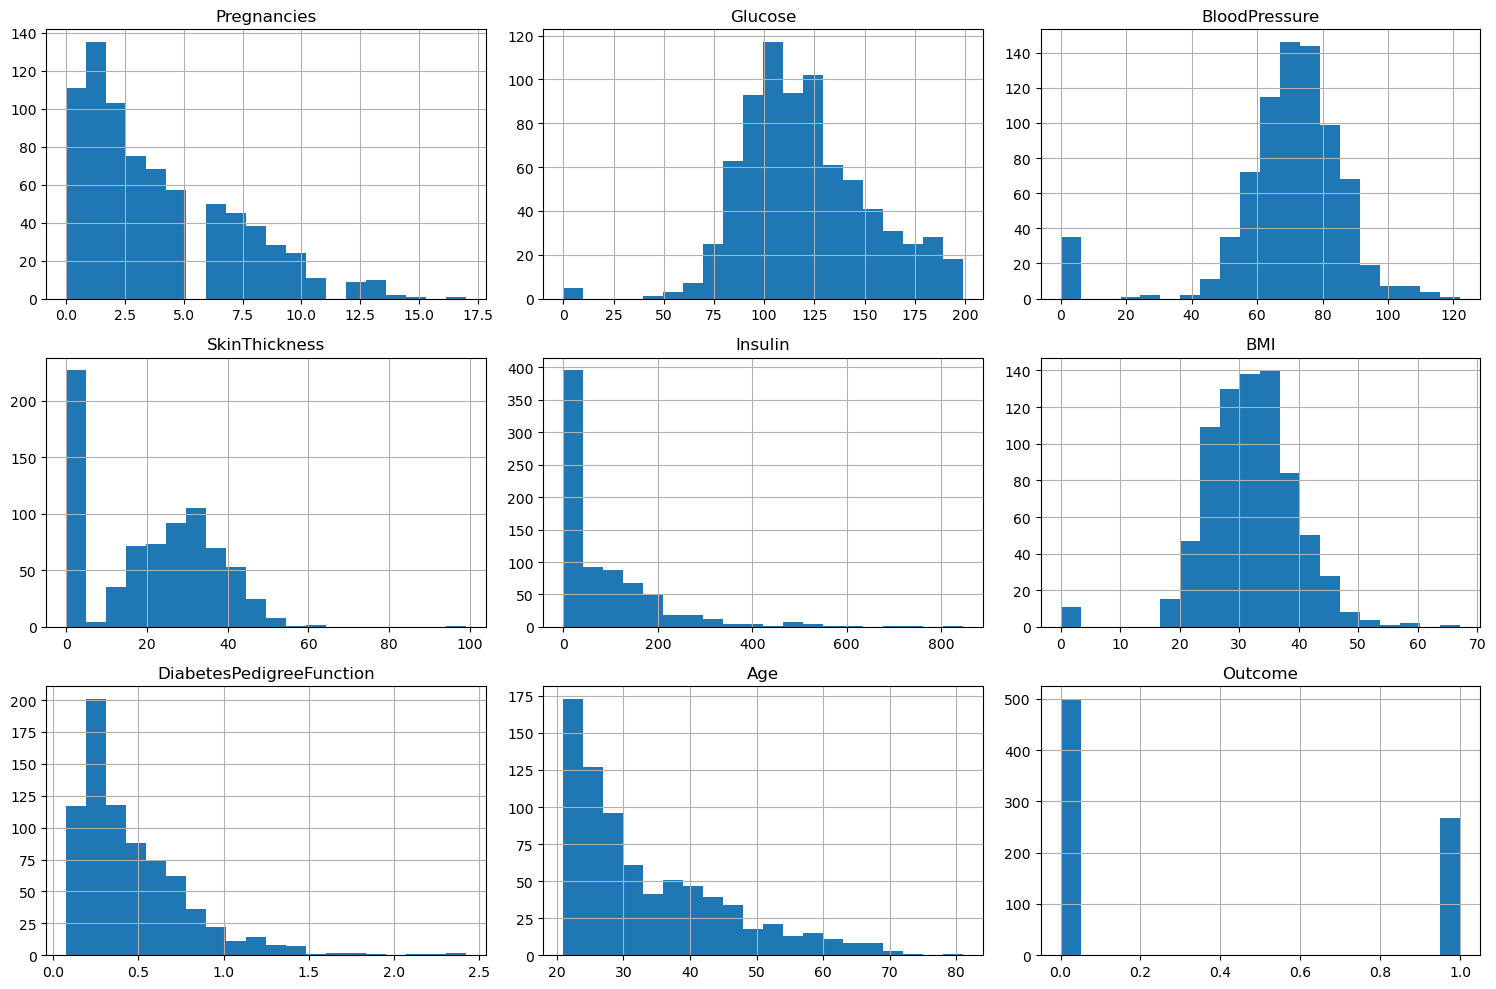

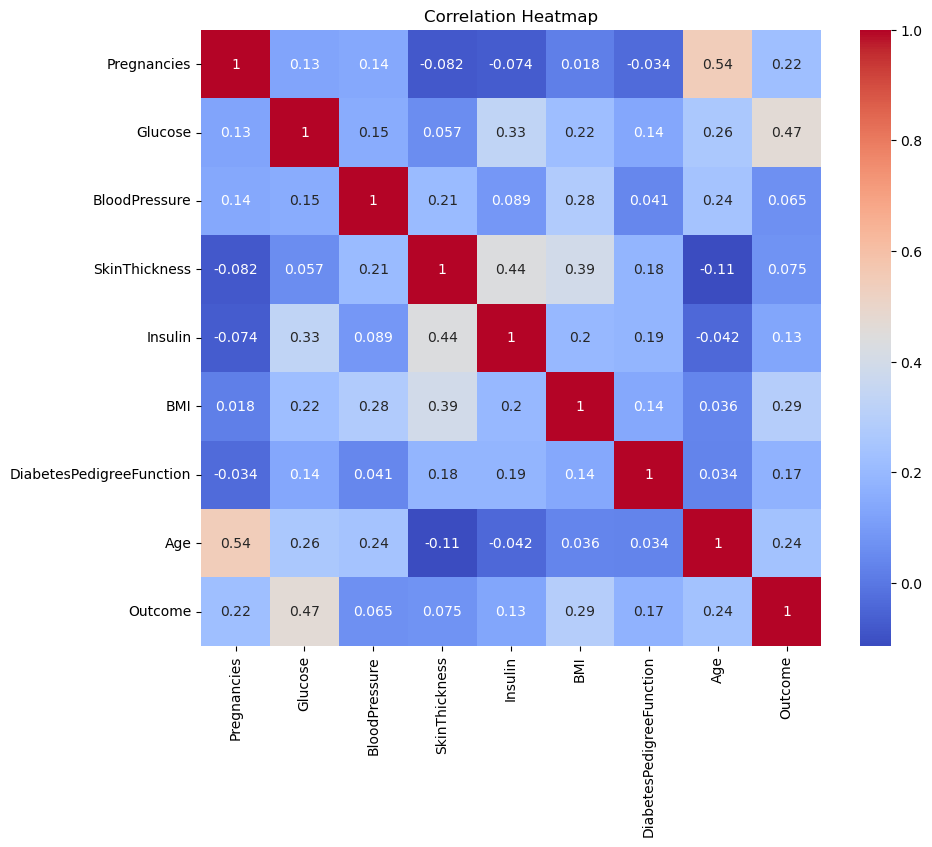

In [14]:
# Check for missing values and display descriptive statistics
print("Missing values:\n", data.isnull().sum())
print("\nDescriptive Statistics:\n", data.describe())

# Plot histograms for each feature
data.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Define features (all columns except 'Outcome') and the target variable ('Outcome')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and testing datasets prepared.")


Training and testing datasets prepared.


Logistic Regression Accuracy: 0.753
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



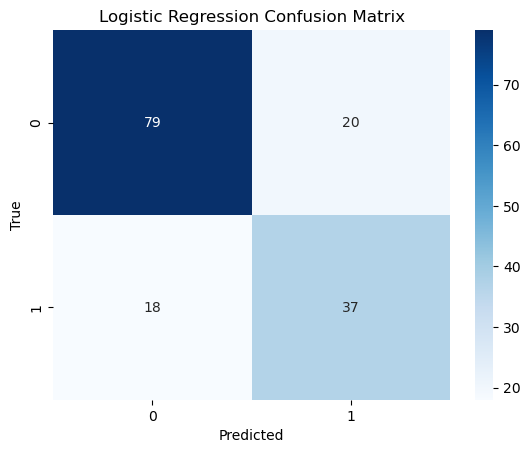

In [18]:
# Train and evaluate Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, pred_logreg)
print("Logistic Regression Accuracy:", round(acc_logreg, 3))
print("Classification Report:\n", classification_report(y_test, pred_logreg))

# Plot confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Accuracy: 0.721
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



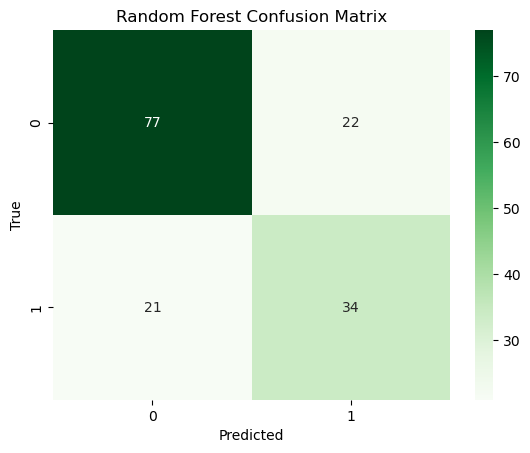

In [20]:
# Train and evaluate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, pred_rf)
print("Random Forest Accuracy:", round(acc_rf, 3))
print("Classification Report:\n", classification_report(y_test, pred_rf))

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


XGBoost Accuracy: 0.734
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



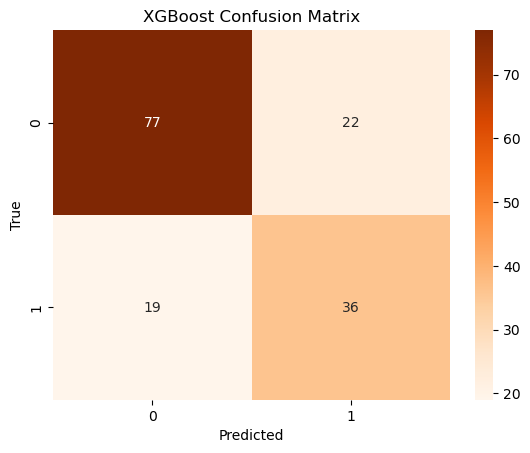

In [22]:
# Train and evaluate XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, pred_xgb)
print("XGBoost Accuracy:", round(acc_xgb, 3))
print("Classification Report:\n", classification_report(y_test, pred_xgb))

# Plot confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
print("Summary of Model Accuracies:")
print("Logistic Regression Accuracy:", round(acc_logreg, 3))
print("Random Forest Accuracy:", round(acc_rf, 3))
print("XGBoost Accuracy:", round(acc_xgb, 3))

# Determine the best model (highest accuracy)
models = {
    'Logistic Regression': acc_logreg,
    'Random Forest': acc_rf,
    'XGBoost': acc_xgb
}
best_model = max(models, key=models.get)
print("\nThe best model is:", best_model, "with an accuracy of approximately", round(models[best_model], 3))


Summary of Model Accuracies:
Logistic Regression Accuracy: 0.753
Random Forest Accuracy: 0.721
XGBoost Accuracy: 0.734

The best model is: Logistic Regression with an accuracy of approximately 0.753


In [32]:
print("Summary of Model Accuracies:")
print("Logistic Regression Accuracy:", round(acc_logreg, 3))
print("Random Forest Accuracy:", round(acc_rf, 3))
print("XGBoost Accuracy:", round(acc_xgb, 3))

# Determine the best model (highest accuracy)
models = {
    'Logistic Regression': acc_logreg,
    'Random Forest': acc_rf,
    'XGBoost': acc_xgb
}
best_model = max(models, key=models.get)
print("\nThe best model is:", best_model, "with an accuracy of approximately", round(models[best_model], 3))


Summary of Model Accuracies:
Logistic Regression Accuracy: 0.753
Random Forest Accuracy: 0.721
XGBoost Accuracy: 0.734

The best model is: Logistic Regression with an accuracy of approximately 0.753
